# Homework 03 - Python introduction

In [1]:
## Import packages
import matplotlib.pyplot as plt
import math

### Exercise 1 - Terminology

Describe the following terms with your own words:

***Function:***
* a procedure that does something for us
* re-useable modules
* something like a "mini-program" that helps to structure the code (decomposition & abstraction)
* self-containted (run in a separate environment)

***Variable:***
* =an object or place holder to store some information (e.g. a value, some data), which is
* identified by a variable name and 
* the stored data can be used throughout the program by calling the variable name instead of the value -> this makes changes easier

***Calling a function:***
* to use/application a function

***String:***
* a data/object type which is
* a sequence of characters for which
* questionmarks "" are used for its identification


### Exercise 2 - spurious correlations

Reproduce a *spurious correlations* plot using `plt.plot()`.

Plot the time series `sociology_doctorates` and `space_launches` on a relative scale, i.e. as percentage of the last data point (i.e. years on the x-axis, relative data on the y-axis, the last data point in both time series should be 100%). Add a second plot which displays the relation between both data sets as scatter plot by using `plt.plot(dataset1, dataset2, 'o')` (data set 1 on x-axis, data set 2 on y-axis absolute units, not percentage).

Instead using the given time series, you can also use any other spurious correlation, if you want to search a different dataset.

Analyze both plots, come up with a wrong conclusion and explain why it is wrong.

Don't forget to label the axis!

![Spurious correlations](spurious-correlations.svg)

Source: https://www.tylervigen.com/spurious-correlations

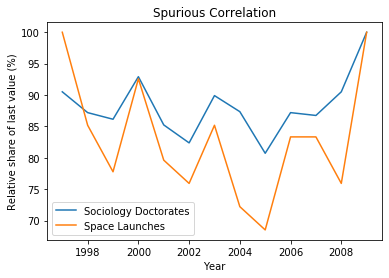

In [2]:


sociology_doctorates = [601, 579, 572, 617, 566, 547, 597, 580, 536, 579, 576, 601, 664]
space_launches = [54, 46, 42, 50, 43, 41, 46, 39, 37, 45, 45, 41, 54]
years = list(range(1997, 2009 + 1))

def share(input_list):
    share = [1] * len(input_list)
    
    for i in range(len(input_list)):
        share[i] = input_list[i] / input_list[-1] * 100
    #share = [input_list[i] / input_list[-1] * 100 for i in range(len(input_list))]
    
    return share


if len(sociology_doctorates) == len(space_launches):
    #pass
    sociology_doctorates_share = share(sociology_doctorates)
    space_launches_share = share(space_launches) 
    
    plt.plot(years, sociology_doctorates_share, label = "Sociology Doctorates")
    plt.plot(years, space_launches_share, label = "Space Launches")
    plt.legend()
    plt.title("Spurious Correlation")
    plt.xlabel("Year")
    plt.ylabel("Relative share of last value (%)")
    plt.show
    
    #print(sociology_doctorates_share, space_launches_share)
else:
    print("Datasets are not of equal length!")




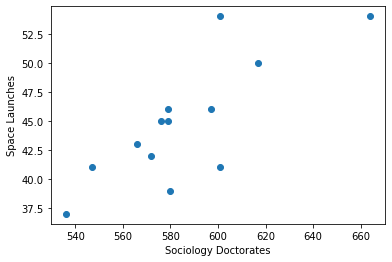

In [3]:
plt.plot(sociology_doctorates, space_launches, "o")
plt.xlabel("Sociology Doctorates")
plt.ylabel("Space Launches")
plt.show()

#### Interpretation
*Plot 1*\
"Sociology Doctorates and Space Launches are positively correlated."\
The development of both Sociology Doctorates and Space Launches show the same trend, i.e. correlates: If the share of Sociology Doctorates decreases, than also the share of Space Launches decreases and vice versa.\

*Plot 2*\
The scatterplot shows, that high values of Sociology Doctorates go along with a high number of Space Launces and low values of Sociology Doctorates go along with a small number of Space Launches. The figure inidates that there might be a linear trend between these two datasets.

*Does this all make sense?*\
No. These two datasets are absolutely independent and therefore the interpretation "Sociology Doctorates and Space Launches are positively corralted" does not make sense, neither can we say that there is a linear relationship between them. It is rather a by coincidence that both datasets show a similar devlopment over time and that a higher/lower number of Sociology Doctorates and Space Launches occur in the same year.


### Exercise 3 - Flatten the curve

Use the logistic growth model to plot an oversimplified version of the [#flattenthecurve](https://www.biospace.com/getasset/fc2b8ad6-697f-49d5-827e-50f4901baf53/) [graphs](https://evilspeculator.com/wp-content/uploads/2020/03/flattenthecurve.jpg).

Write a function `new_infections(t, k)` which returns the number of new infections given by the following formula:

$i_{\textrm{new}}(t):=\frac{e^\left(-k \cdot P \cdot t\right) \cdot k \cdot P^2 \cdot \left(-1 + \frac{P}{i_0}\right)}{\left(1 + e^\left(-k \cdot P \cdot t \right) \cdot \left(-1 + \frac{P}{i_0}\right) \right)^2}$

Plot the number of infections for $t=0,\ldots,250$, $P=1\,000\,000$, $i_0=1$ and $k= \frac{3}{P \cdot 10}$.

Also add a horizontal line and label it with "healthcare system capacity".

Then analyze the plot for different values of $k$ and explain in detail why one should not use this model/plot to predict the outcome of an epidemic.

Bonus question: Is there something one can still learn from it?

##### Motivation

The motivation is not important for the programming task. There is no need to understand all details in order to do the exercise.

For a fixed population with $P$ individuals, $i(t)$ is the number of infections at time $t$. We assume that every individual stays infectious once infected. 

Choosing a random pair of individuals from the population, a new infection will take place with probability $2 \cdot \frac{i(t)}{P} \cdot \frac{P - i(t)}{P}$. If we assume that every infected individual will meet approximately $c$ others in every time step (and infect them if they are not yet infected), there is a total number of contacts $\frac{c \cdot P}{2}$ in every time step. That means we expect a total number of new infections:

$i_{\textrm{new}}(t) = \frac{c \cdot P}{2} \cdot 2 \cdot \frac{i(t)}{P} \cdot \frac{P - i(t)}{P} = \underbrace{\frac{c}{P}}_{=:k} \cdot \left(i(t) \cdot \left(P - i(t)\right) \right)$

This leads to the differential equation:

$i'(t) = i_{\textrm{new}}(t) = k \cdot \left(i(t) \cdot \left(P - i(t)\right) \right)$

A solution is given by:

$i(t) = \frac{P}{\left(1 + e^\left(-k \cdot P \cdot t \right) \cdot \left(\frac{P}{i_0} - 1\right)\right)}$

Differentiating $i(t)$ gives the number of new infections:

$i_{\textrm{new}}(t):=i'(t) = \frac{e^\left(-k \cdot P \cdot t\right) \cdot k \cdot P^2 \cdot \left(-1 + \frac{P}{i_0}\right)}{\left(1 + e^\left(-k \cdot P \cdot t \right) \cdot \left(-1 + \frac{P}{i_0}\right) \right)^2}$


[3blue1brown](https://www.youtube.com/watch?v=gxAaO2rsdIs) has a great video on the topic. If you are interested in a model which is a bit closer to the real world, but still quite simple, have a look at the [SIR model](https://www.youtube.com/watch?v=Qrp40ck3WpI). A large part of this is inspired by the [German Wikipiedia page](https://de.wikipedia.org/wiki/Logistische_Funktion).

##### Solution

Write your code here:

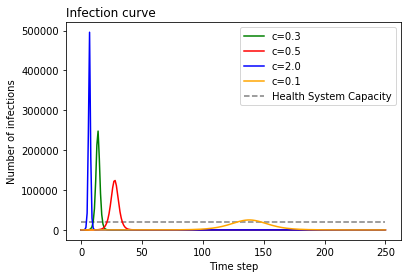

In [5]:
## t...time span
## c...number of met individuals by infected person (e.g. 0.25 he meets 1 person every 4 days)
## k = how many others of total population an infected individual meets+infects per time step

def new_infection(t,c): # by allowing to define c at the function call, we also vary k and preserve the relationship k=c/P
    
    # other version, to vary k with the function call would be def new_infection(t,k):
    # c = k*P
    
    P = 1_000_000 # constant population
    k = c/P
    i_0 = 1
    temp_e = math.exp(-k * P * t)
    temp_p = (-1 + (P / i_0))
    
    i_t = (temp_e * k * P**2 * temp_p) / (1 + temp_e * temp_p)**2
    
    return i_t

### Try with different values for c and therfore for k
# empty list
infected_v1 = list()

# t=0,...,250
for t in range(250):
    infected_v1.append(new_infection(t, 1))
    
#infected_v1 = [new_infection(t, 0.3) for t in range(0,251)]

#print(infected_v1)

plt.plot(infected_v1, color = "green", label = "c=0.3")

infected_v2 = list()
infected_v2 = [new_infection(t, 0.5) for t in range (0,251)]
plt.plot(infected_v2, color = "red", label = "c=0.5")

infected_v3 = list()
infected_v3 = [new_infection(t, 2) for t in range (0, 251)]
plt.plot(infected_v3, color = "blue", label = "c=2.0")

infected_v4 = list()
infected_v4 = [new_infection(t, 0.1) for t in range (0, 251)]
plt.plot(infected_v4, color = "orange", label = "c=0.1")

# Let's assume a health system capacity of 20000
plt.hlines(y = 20000, xmin = 0, xmax = 250, color = "grey", linestyles = "dashed", label = "Health System Capacity")

plt.xlabel("Time step")
plt.ylabel("Number of infections")
plt.title("Infection curve", loc = "left")
plt.legend()
plt.show()


##### Bonus: Interactive plot

If you want an interactive widget to control the parameter c, you can use the following code.

**Warning:** After running `%matplotlib notebook` you cannot plot in other cells any longer. Restart the Jupyter kernel and refresh the browser window to disable again.

```Python
%matplotlib notebook
from ipywidgets import interact

line, = plt.plot(x, y)

# write here more plotting code (axis label etc)

def update(c=3.0/10.):
    line.set_ydata([new_infections(t, c  / P) for t in time_range])

interact(update);
```

In [ ]:
%matplotlib notebook
from ipywidgets import interact

line, = plt.plot(range(251))
#plt.ylim(0, 1_000_000*0.6)  # for a fixed y-axis range

plt.hlines(y = 20000, xmin = 0, xmax = 250, color = "grey", linestyles = "dashed", label = "Health System Capacity")
plt.xlabel("Time step")
plt.ylabel("Number of infections")
plt.title("Infection curve", loc = "left")
plt.legend()

def update(c=0.5):
    #x = c
    infected = [new_infection(t, c) for t in range(0, 251)]
    line.set_ydata(infected)
    plt.ylim(0, max(infected)*1.1) # for a variable y-axis range
    line.set_label("c=" + str(c))
    plt.legend()
    
    
interact(update, c=(.10, 3.00, 0.05))


### Exercise 4 - Fibonacci 

Write a function `fibonacci(n)` which calculates the n-th [Fibonacci number](https://en.wikipedia.org/wiki/Fibonacci_number), defined by $f(0)=0$, $f(1)=1$ and $f(n) = f(n-1)+f(n-2)$.

Use the function to calculate $f(100)$.

In [9]:
test = int(input("Please enter which Fibonacci number f(n) you want to calculate? "))

#-------##-------#
## Save in list
def fibonacci_list(n):
    if n < 0:
        return("Input must be >= 0.")
        
    if n <= 1:
        return n
    
    # set first to entries of the Fibonacci function
    fibo = [0, 1]

    for i in range(2, n+1):
        fibo.append(fibo[i-1] + fibo[i-2])
       
    return fibo[-1]

print("Fibonacci for n =", test, "with a function that stores each step in a list:", fibonacci_list(test))


#-------##-------#
## Recursive
def fibonacci_rec(n):
    #print("Fibonacci of " + str(n))
    
    if n < 0:
        return("Input must be >= 0.")
    
    if n == 0:
        return 0
    if n == 1:
        return 1
    
    return (fibonacci_rec(n-1) + fibonacci_rec(n-2))

# works for small numbers
print("Fibonacci for n =", test, "with recursive function:", fibonacci_rec(test))

# Problem for large numbers
#print(fibonacci_rec(1000)) # not run


#-------##-------#
## Save previous steps
def fibonacci_v3(n):
    a = 0
    b = 1
    
    if n < 0:
        return("Input must be >= 0.")
    
    if n <= 1:
        return n
    
    for i in range(2,n+1):
        c = a + b
        a = b
        b = c
        
    return c

print("Fibonacci for n = ", test, ", saving only f(n-1) and f(n-2): ", fibonacci_v3(test), sep = "")

    
    
    

Please enter which Fibonacci number f(n) you want to calculate? 7
Fibonacci for n = 7 with a function that stores each step in a list: 13
Fibonacci for n = 7 with recursive function: 13
Fibonacci for n = 7, saving only f(n-1) and f(n-2): 13
